In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scripts.homeos import *
from pathlib import Path
import pickle
exp_dir = Path('experiments')
data_dir = exp_dir / 'all_targets'
motif_dir = data_dir / 'lambda_motif_fits'

plt.rcParams['xtick.labelsize'] = 14  # font size
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams["font.family"] = "serif"
mpl.rcParams['pdf.fonttype'] = 42  # Use TrueType fonts (editable in Illustrator)
mpl.rcParams['ps.fonttype'] = 42   # Same for EPS
mpl.rcParams['svg.fonttype'] = 'none'  # Keep text as text in SVG
# plt.rcParams.update(plt.rcParamsDefault) # Reset to default settings
plt.rcParams.update({'font.size': 12, 'text.usetex': True,'text.latex.preamble': r'\usepackage{amsfonts}'})

In [6]:

def hinton(matrix, ax=None, max_weight=None):
    """Draws a Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()
    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    if max_weight is None:
        max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    for (y, x), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

In [7]:
motif_target_dis_dict = {}
motif_folders = list(motif_dir.glob('*'))
for folder in motif_folders:
    motif_name = folder.name
    #print("Motif: ", motif_name)
    motif_target_dis_dict[motif_name] = {}
    result_files = list(folder.glob('*.npz'))
    for result_file in result_files:
        target_name = result_file.name.split('.')[0][8:]  #skip 'result_'
        print("Target: ", target_name) 
        data = np.load(result_file)
        motif_target_dis_dict[motif_name][target_name] = {
            'train_error': data['training_loss'],
            'test_error': data['test_loss'],
            'jac_fro': data['jac_fro'],
            'jac_spec': data['jac_spec'],
        }

Target:  bila_trajs
Target:  bz_reaction_trajectories_target
Target:  homeo_pert_ring
Target:  lienard_sigmoid_trajectories_target
Target:  noisy_vdp_trajectories_target
Target:  ra
Target:  ra_trajectories_target
Target:  selkov_trajectories_target
Target:  vdp_trajectories_target
Target:  vf_pert_ring
Target:  bila_trajs
Target:  bz_reaction_trajectories_target
Target:  homeo_pert_ring
Target:  lienard_sigmoid_trajectories_target
Target:  noisy_vdp_trajectories_target
Target:  ra_trajectories_target
Target:  ra_trajectories_target_nstd0
Target:  selkov_trajectories_target
Target:  vdp_trajectories_target
Target:  vf_pert_ring
Target:  bila_trajs
Target:  bz_reaction_trajectories_target
Target:  homeo_pert_ring
Target:  lienard_sigmoid_trajectories_target
Target:  noisy_vdp_trajectories_target
Target:  ra_trajectories_target
Target:  ra_trajectories_target_nstd0
Target:  selkov_trajectories_target
Target:  vdp_trajectories_target
Target:  vf_pert_ring
Target:  bila_trajs
Target:  bz_r

In [8]:
#lds 0.6549397110939026#
# ring 0.08658844977617264
# bistable 0.6625669002532959

# lds tensor(0.3999)
# ring tensor(2.2700)
#bistable tensor(0.8518)
# bla tensor(5.5167)
# lc tensor(4.9012)

motif_target_dis_dict['lds']['avi'] = {}
motif_target_dis_dict['lds']['avi']['test_error'] = 0.6549397110939026
motif_target_dis_dict['lds']['avi']['jac_fro'] = 0.3999

motif_target_dis_dict['ring']['avi'] = {}
motif_target_dis_dict['ring']['avi']['test_error'] = 0.08658844977617264
motif_target_dis_dict['ring']['avi']['jac_fro'] = 2.2700

motif_target_dis_dict['bistable']['avi'] = {}
motif_target_dis_dict['bistable']['avi']['test_error'] = 0.6625669002532959
motif_target_dis_dict['bistable']['avi']['jac_fro'] = 0.8518

motif_target_dis_dict['bla']['avi'] = {}
motif_target_dis_dict['bla']['avi']['test_error'] = 1.24440625 
motif_target_dis_dict['bla']['avi']['jac_fro'] = 1.4504

motif_target_dis_dict['lc']['avi'] = {}
motif_target_dis_dict['lc']['avi']['test_error'] = 0.4843166470527649
motif_target_dis_dict['lc']['avi']['jac_fro'] = 1.9012



In [9]:
motif_target_dis_dict
len(motif_target_dis_dict)
n_motifs = len(motif_target_dis_dict.keys())
n_targets = len(motif_target_dis_dict['bla'].keys()) 

#remove bistable motif
#if 'bistable' in motif_target_dis_dict.keys():
#    del motif_target_dis_dict['bistable']
#    n_motifs -= 1

for motif_name in motif_target_dis_dict.keys():
    if 'bz_reaction_trajectories_target'[:] in motif_target_dis_dict[motif_name].keys():
        del motif_target_dis_dict[motif_name]['bz_reaction_trajectories_target']

for motif_name in motif_target_dis_dict.keys():
    if 'ra_trajectories_target_nstd0'[:-20] in motif_target_dis_dict[motif_name].keys():
        del motif_target_dis_dict[motif_name]['ra_trajectories_target_nstd0'[:-20]]

# convert to numpy array
# motif_target_train = np.zeros((n_motifs, n_targets))
# for i, motif_name in enumerate(motif_target_dis_dict.keys()):
#     for j, target_name in enumerate(motif_target_dis_dict[motif_name].keys()):
#         motif_target_train[i, j] = motif_target_dis_dict[motif_name][target_name]['train_error']

motif_target_test = np.zeros((n_motifs, n_targets))
for i, motif_name in enumerate(motif_target_dis_dict.keys()):
    print(motif_name)
    for j, target_name in enumerate(motif_target_dis_dict[motif_name].keys()):
        print(target_name, motif_target_dis_dict[motif_name][target_name]['test_error'])
        motif_target_test[i, j] = motif_target_dis_dict[motif_name][target_name]['test_error']
        print(motif_target_test[i, j])

motif_target_fro = np.zeros((n_motifs, n_targets))
for i, motif_name in enumerate(motif_target_dis_dict.keys()):
    for j, target_name in enumerate(motif_target_dis_dict[motif_name].keys()):
        motif_target_fro[i, j] = motif_target_dis_dict[motif_name][target_name]['jac_fro']

# motif_target_spec = np.zeros((n_motifs, n_targets))
# for i, motif_name in enumerate(motif_target_dis_dict.keys()):
#     for j, target_name in enumerate(motif_target_dis_dict[motif_name].keys()):

#         motif_target_spec[i, j] = motif_target_dis_dict[motif_name][target_name]['jac_spec']

bibla
bistable
bila_trajs 0.13304264843463898
0.13304264843463898
homeo_pert_ring 0.007366609759628773
0.007366609759628773
lienard_sigmoid_trajectories_target 2.1066782474517822
2.1066782474517822
noisy_vdp_trajectories_target 1.9156290292739868
1.9156290292739868
ra 0.009084338322281837
0.009084338322281837
ra_trajectories_target 0.009084338322281837
0.009084338322281837
selkov_trajectories_target 1.3519943952560425
1.3519943952560425
vdp_trajectories_target 1.8118358850479126
1.8118358850479126
vf_pert_ring 0.005925541743636131
0.005925541743636131
avi 0.6625669002532959
0.6625669002532959
bla
bila_trajs 0.4897485673427582
0.4897485673427582
homeo_pert_ring 0.13436740636825562
0.13436740636825562
lienard_sigmoid_trajectories_target 0.408515602350235
0.408515602350235
noisy_vdp_trajectories_target 0.8254861831665039
0.8254861831665039
ra_trajectories_target 0.43187886476516724
0.43187886476516724
ra_trajectories_target_nstd0 0.020644893869757652
0.020644893869757652
selkov_trajectori

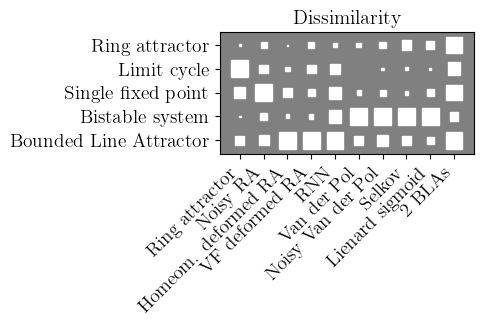

In [10]:
# name mapping for plotting
target_sns = list(motif_target_dis_dict['bla'].keys())
target_order = ['ra_trajectories_target', 'ra_trajectories_target_nstd0', 'homeo_pert_ring', 'avi',
                 'vdp_trajectories_target', 'noisy_vdp_trajectories_target', 'selkov_trajectories_target', 'lienard_sigmoid_trajectories_target'
                 ] #'bibla'
                #'bz_reaction_trajectories_target']
target_name_map = {#'bz_reaction_trajectories_target': 'BZ reaction',
                   'lienard_sigmoid_trajectories_target': 'Lienard sigmoid',
                   'selkov_trajectories_target': 'Selkov',
                    'vdp_trajectories_target': 'Van der Pol',
                   'noisy_vdp_trajectories_target': 'Noisy Van der Pol',
                     'ra_trajectories_target': 'Ring attractor',
                     'ra_trajectories_target_nstd0': 'Noisy RA',
                     'homeo_pert_ring': 'Homeom. deformed RA',
                     'vf_pert_ring': 'VF deformed RA',
                     'bila_trajs': '2 BLAs',
                        'avi': 'RNN',
}

source_sns = list(motif_target_dis_dict.keys())
source_name_map = {'bla': 'Bounded Line Attractor',
                   'bistable': 'Bistable system',
                   'lds': 'Single fixed point',
                   'lc': 'Limit cycle',
                   'ring': 'Ring attractor',
}

# Specify the desired target order
target_order = [
    'ra_trajectories_target',
    'ra_trajectories_target_nstd0',
    'homeo_pert_ring',
    'vf_pert_ring',
    'avi',
    'vdp_trajectories_target',
    'noisy_vdp_trajectories_target',
    'selkov_trajectories_target',
    'lienard_sigmoid_trajectories_target',
    'bila_trajs'
]

source_order = ['ring', 'lc', 'lds', 'bistable', 'bla']
# Current order in the matrix
current_targets = list(motif_target_dis_dict['ring'].keys())
current_sources = list(motif_target_dis_dict.keys())

# Compute index permutations
target_indices = [current_targets.index(t) for t in target_order]
source_indices = [current_sources.index(s) for s in source_order]

# Permute matrix
motif_target_test_permuted = motif_target_test[np.ix_(source_indices, target_indices)]
motif_target_fro_permuted = motif_target_fro[np.ix_(source_indices, target_indices)]

# Build label mappings (fallback to raw name if not in dict)
xtick_labels = [target_name_map.get(t, t) for t in target_order]
ytick_labels = [source_name_map.get(s, s) for s in source_order]

# Plot
fig, ax = plt.subplots(figsize=(5, 4))
hinton(motif_target_test_permuted/motif_target_test_permuted.max(axis=0), ax=ax, max_weight=2)
ax.set_title("Dissimilarity")

ax.set_xticks(np.arange(len(target_order)))
ax.set_yticks(np.arange(len(source_order)))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
ax.set_yticklabels(ytick_labels)
plt.tight_layout()
plt.savefig(data_dir/'motif_target_dissimilarity_row.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
def hinton_double(matrix1, matrix2, ax=None, max_weight=None,
                  color1='cyan', color2='green', alpha=0.5,
                  flipped=True):
    """Draws two Hinton diagrams for visualizing two weight matrices."""
    ax = ax if ax is not None else plt.gca()
    #ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    # if max_weight is None:
    #     max_weight1 = 2 ** np.ceil(np.log2(np.abs(matrix1).max()))
    #     max_weight2 = 2 ** np.ceil(np.log2(np.abs(matrix2).max()))
    # else:
    #     max_weight1 = max_weight
    #     max_weight2 = max_weight

    max_weight1 = 1
    max_weight2 = 1
    for (y, x), w in np.ndenumerate(matrix1):
        #color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight1)
        if flipped:
            size = 1 - size
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color1, edgecolor='k', alpha=alpha)
        ax.add_patch(rect)

    for (y, x), w in np.ndenumerate(matrix2):
        #color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight2)
        if flipped:
            size = 1 - size
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color2, edgecolor='k', alpha=alpha)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


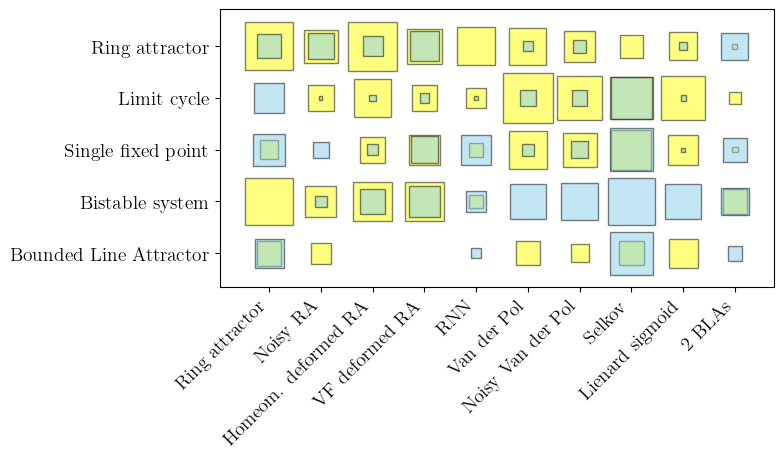

In [12]:
test_rn = motif_target_test_permuted/motif_target_test_permuted.max(axis=0)
comp_rn = motif_target_fro_permuted/motif_target_fro_permuted.max(axis=0)
fig, ax = plt.subplots(figsize=(8, 8))
hinton_double(test_rn, comp_rn, ax=ax, max_weight=1, color1='#ffff00', color2='skyblue', alpha=0.5)
ax.set_xticks(np.arange(len(target_order)))
ax.set_yticks(np.arange(len(source_order)))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
ax.set_yticklabels(ytick_labels)
plt.tight_layout()
plt.savefig(data_dir/'motif_target_discomp_row.pdf', dpi=300, bbox_inches='tight')

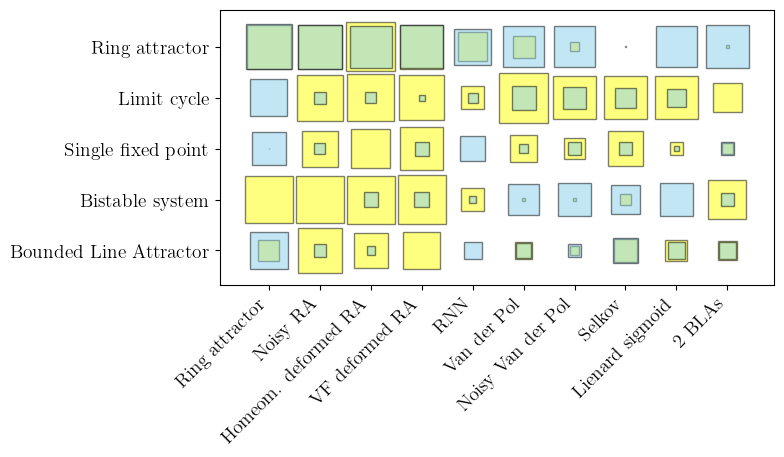

In [234]:
test_rn = motif_target_test_permuted/motif_target_test_permuted.max(axis=1).reshape(-1, 1)
comp_rn = motif_target_fro_permuted/motif_target_fro_permuted.max(axis=1).reshape(-1, 1)
fig, ax = plt.subplots(figsize=(8, 8))
hinton_double(test_rn, comp_rn, ax=ax, max_weight=1, color1='#ffff00', color2='skyblue', alpha=0.5)
ax.set_xticks(np.arange(len(target_order)))
ax.set_yticks(np.arange(len(source_order)))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
ax.set_yticklabels(ytick_labels)
plt.tight_layout()
plt.savefig(data_dir/'motif_target_discomp_column.pdf', dpi=300, bbox_inches='tight')

## Periods

In [44]:
folder = motif_dir / 'lc' 
result_files = list(folder.glob('parameters*'))

folder = motif_dir / 'lc' 
hdsn_files = list(folder.glob('*.pth'))
hdsn_files, result_files

([WindowsPath('experiments/all_targets/lambda_motif_fits/lc/homeo_bz_reaction_trajectories_target.pth'),
  WindowsPath('experiments/all_targets/lambda_motif_fits/lc/homeo_homeo_pert_ring.pth'),
  WindowsPath('experiments/all_targets/lambda_motif_fits/lc/homeo_lienard_sigmoid_trajectories_target.pth'),
  WindowsPath('experiments/all_targets/lambda_motif_fits/lc/homeo_noisy_vdp_trajectories_target.pth'),
  WindowsPath('experiments/all_targets/lambda_motif_fits/lc/homeo_ra_trajectories_target.pth'),
  WindowsPath('experiments/all_targets/lambda_motif_fits/lc/homeo_ra_trajectories_target_nstd0.25.pth'),
  WindowsPath('experiments/all_targets/lambda_motif_fits/lc/homeo_selkov_trajectories_target.pth'),
  WindowsPath('experiments/all_targets/lambda_motif_fits/lc/homeo_vdp_trajectories_target.pth')],
 [WindowsPath('experiments/all_targets/lambda_motif_fits/lc/parameters_bz_reaction_trajectories_target.pkl'),
  WindowsPath('experiments/all_targets/lambda_motif_fits/lc/parameters_homeo_pert_rin

In [52]:
for fi, file in enumerate(result_files[:]):
    if fi == 0:
        continue
    print(fi,file)
    all_parameters = pickle.load(open(file, "rb"))
    homeo = build_homeomorphism(all_parameters['homeo_params'])
    dynsys = build_ds_motif(**all_parameters['ds_params'])
    print(all_parameters['ds_params']['dt'])
    # dynsys.alpha = -1. 
    homeo_ds_net = load_homeo_ds_net(hdsn_files[fi], homeo, dynsys)
    print(hdsn_files[fi].name, "v =", np.round(homeo_ds_net.dynamical_system.velocity.item()/dynsys.dt,3))

1 experiments\all_targets\lambda_motif_fits\lc\parameters_homeo_pert_ring.pkl
0.5
Model loaded from experiments\all_targets\lambda_motif_fits\lc\homeo_homeo_pert_ring.pth
homeo_homeo_pert_ring.pth v = 0.02
2 experiments\all_targets\lambda_motif_fits\lc\parameters_lienard_sigmoid_trajectories_target.pkl
0.03333333333333333
Model loaded from experiments\all_targets\lambda_motif_fits\lc\homeo_lienard_sigmoid_trajectories_target.pth
homeo_lienard_sigmoid_trajectories_target.pth v = -46.058
3 experiments\all_targets\lambda_motif_fits\lc\parameters_noisy_vdp_trajectories_target.pkl
0.1
Model loaded from experiments\all_targets\lambda_motif_fits\lc\homeo_noisy_vdp_trajectories_target.pth
homeo_noisy_vdp_trajectories_target.pth v = -9.883
4 experiments\all_targets\lambda_motif_fits\lc\parameters_ra_trajectories_target.pkl
0.5
Model loaded from experiments\all_targets\lambda_motif_fits\lc\homeo_ra_trajectories_target.pth
homeo_ra_trajectories_target.pth v = -2.04
5 experiments\all_targets\lambd

# Trajectories and invariant manifolds

In [82]:
from scripts.time_series import *
fig_dir = Path('figures') / 'all_sources'
def normalize_scale_pair_np(trajectories_target_full, training_pairs=False):
    mean = np.mean(trajectories_target_full, axis=(0, 1), keepdims=True)
    std = np.std(trajectories_target_full, axis=(0, 1), keepdims=True)

    normalized = (trajectories_target_full - mean) / (std + 1e-8)

    if training_pairs:
        return trajectories_target_full, normalized, mean, std
    else:
        return normalized, normalized, mean, std

folder = motif_dir
target_files = list(data_dir.glob('*.npy'))[1:] #ignore avi for now
archtype_folders = list(folder.glob('*'))


In [80]:
print("Targets:")
for tf in target_files:
    print(tf.name)
print("\n")
print("Archetypes:")
for af in archtype_folders:
    print(af.name)

Targets:
bila_trajs.npy
homeo_pert_ring.npy
lienard_sigmoid.npy
noisy_vdp.npy
ra.npy
ra_nstd0.25.npy
selkov.npy
vdp.npy
vf_pert_ring.npy


Archetypes:
bistable
bla
lc
lds
ring


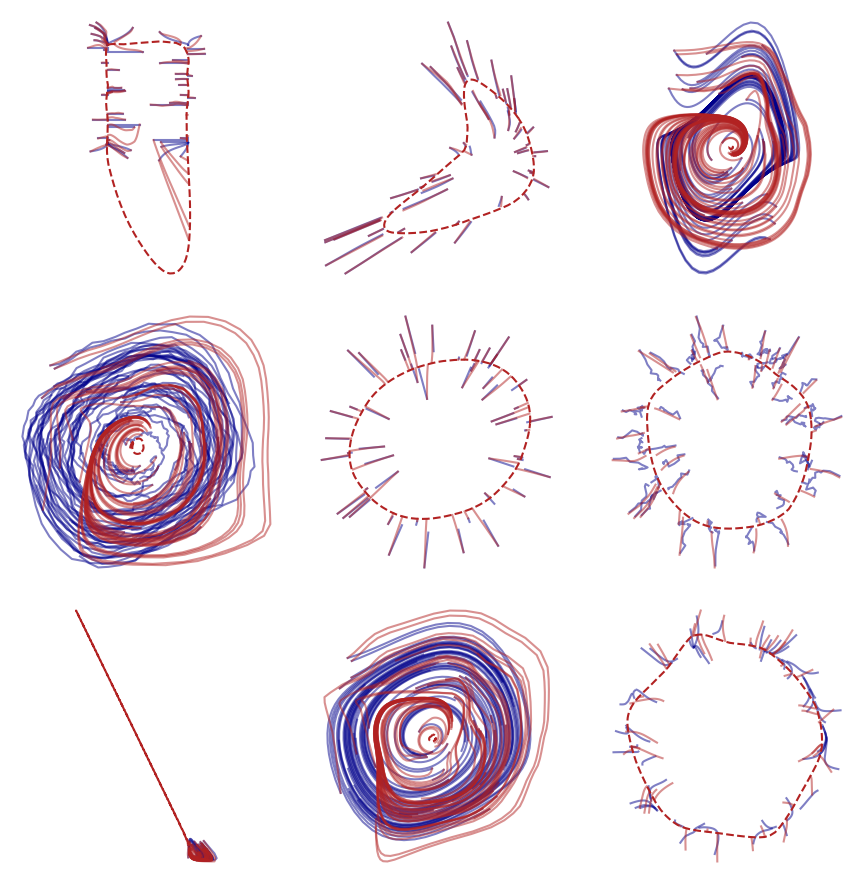

In [83]:
#first target
#last archetype (ring)
archtype_j = -1
ring_target_fits = list(archtype_folders[archtype_j].glob('*.npz'))
traj_source_files = list(archtype_folders[archtype_j].glob('traj_motif_source*.npy'))
traj_motif_transformed_files = list(archtype_folders[archtype_j].glob('traj_motif_transformed*.npy'))


fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()  # Flatten 3x3 array into a list of 9 axes

for target_i in range(len(target_files)):
    ax = axes[target_i]

    trajectories_target = np.load(target_files[target_i])
    trajectories_target_full, trajectories_target, mean, std = normalize_scale_pair_np(trajectories_target, False)

    #traj_motif_source = np.load(traj_source_files[target_i])
    traj_motif_transformed = np.load(traj_motif_transformed_files[target_i])
    inv_man = np.load(ring_target_fits[target_i])['inv_man']

    for i in range(trajectories_target.shape[0]):
        ax.plot(trajectories_target[i, :, 0], trajectories_target[i, :, 1], color='darkblue', alpha=0.5)
    for i in range(traj_motif_transformed.shape[0]):
        ax.plot(traj_motif_transformed[i, :, 0], traj_motif_transformed[i, :, 1], color='firebrick', alpha=0.5)
    
    ax.plot(inv_man[:, 0], inv_man[:, 1], '--', color='firebrick')
    ax.set_aspect('equal')
    ax.axis('off')

plt.tight_layout()
plt.savefig(fig_dir / 'ring_traj_invman.pdf', dpi=300, bbox_inches='tight')
plt.show()

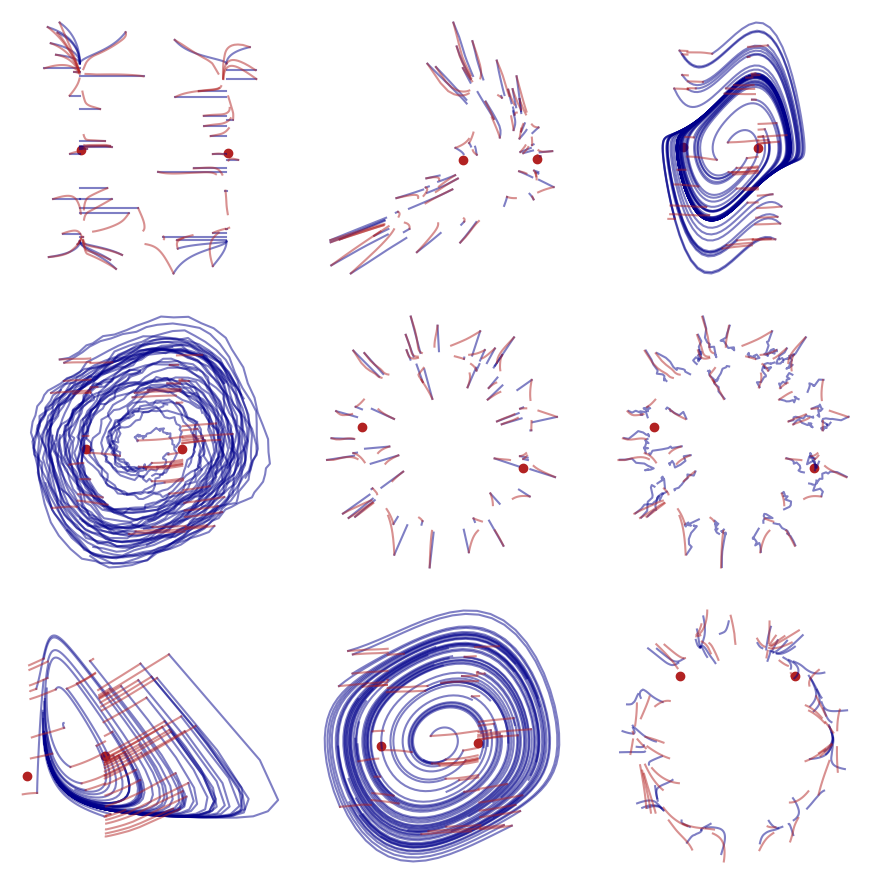

In [84]:
#first archetype (bistable)
archtype_j = 0
ring_target_fits = list(archtype_folders[archtype_j].glob('*.npz'))
traj_source_files = list(archtype_folders[archtype_j].glob('traj_motif_source*.npy'))
traj_motif_transformed_files = list(archtype_folders[archtype_j].glob('traj_motif_transformed*.npy'))


fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()  # Flatten 3x3 array into a list of 9 axes

for target_i in range(len(target_files)):
    ax = axes[target_i]

    trajectories_target = np.load(target_files[target_i])
    trajectories_target_full, trajectories_target, mean, std = normalize_scale_pair_np(trajectories_target, False)

    #traj_motif_source = np.load(traj_source_files[target_i])
    traj_motif_transformed = np.load(traj_motif_transformed_files[target_i])
    inv_man = np.load(ring_target_fits[target_i])['inv_man']

    for i in range(trajectories_target.shape[0]):
        ax.plot(trajectories_target[i, :, 0], trajectories_target[i, :, 1], color='darkblue', alpha=0.5)
    for i in range(traj_motif_transformed.shape[0]):
        ax.plot(traj_motif_transformed[i, :, 0], traj_motif_transformed[i, :, 1], color='firebrick', alpha=0.5)
    
    ax.scatter(inv_man[:, 0], inv_man[:, 1],  color='firebrick')
    ax.set_aspect('equal')
    ax.axis('off')

plt.tight_layout()
plt.savefig(fig_dir/'bistable_traj_invman.pdf', dpi=300, bbox_inches='tight')
plt.show()

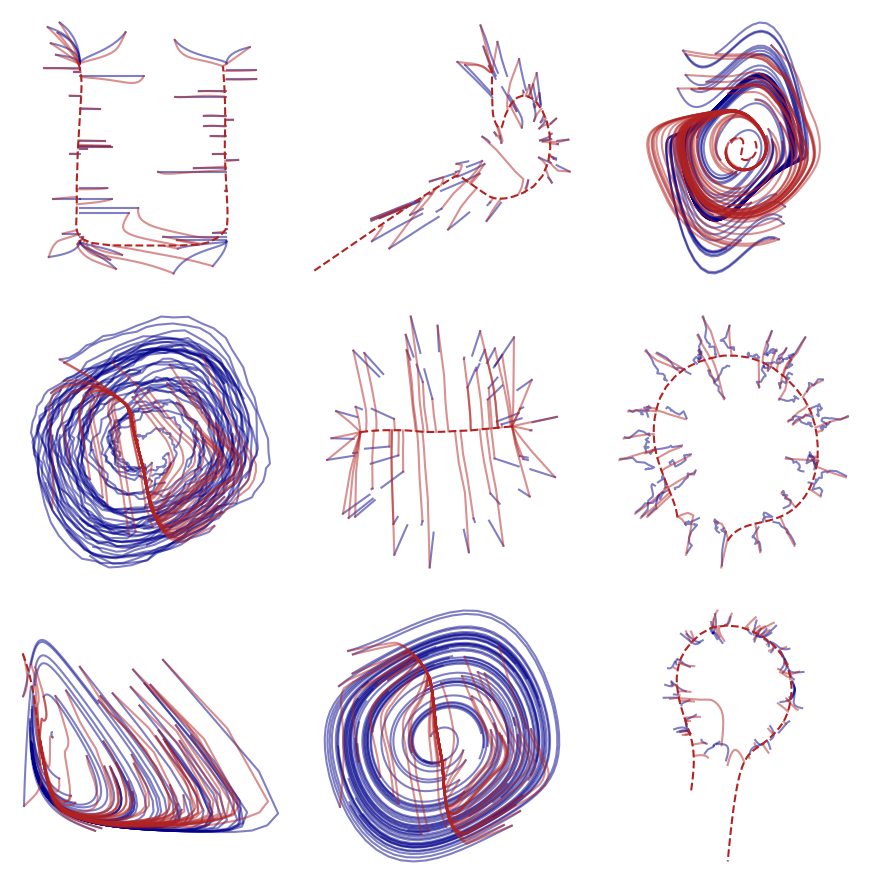

In [85]:
#second archetype (bla)
archtype_j = 1
ring_target_fits = list(archtype_folders[archtype_j].glob('*.npz'))
traj_source_files = list(archtype_folders[archtype_j].glob('traj_motif_source*.npy'))
traj_motif_transformed_files = list(archtype_folders[archtype_j].glob('traj_motif_transformed*.npy'))


fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()  # Flatten 3x3 array into a list of 9 axes

for target_i in range(len(target_files)):
    ax = axes[target_i]

    trajectories_target = np.load(target_files[target_i])
    trajectories_target_full, trajectories_target, mean, std = normalize_scale_pair_np(trajectories_target, False)

    #traj_motif_source = np.load(traj_source_files[target_i])
    traj_motif_transformed = np.load(traj_motif_transformed_files[target_i])
    inv_man = np.load(ring_target_fits[target_i])['inv_man']

    for i in range(trajectories_target.shape[0]):
        ax.plot(trajectories_target[i, :, 0], trajectories_target[i, :, 1], color='darkblue', alpha=0.5)
    for i in range(traj_motif_transformed.shape[0]):
        ax.plot(traj_motif_transformed[i, :, 0], traj_motif_transformed[i, :, 1], color='firebrick', alpha=0.5)
    
    ax.plot(inv_man[:, 0], inv_man[:, 1], '--', color='firebrick')
    ax.set_aspect('equal')
    ax.axis('off')

plt.tight_layout()
plt.savefig(fig_dir/'bla_traj_invman.pdf', dpi=300, bbox_inches='tight')
plt.show()

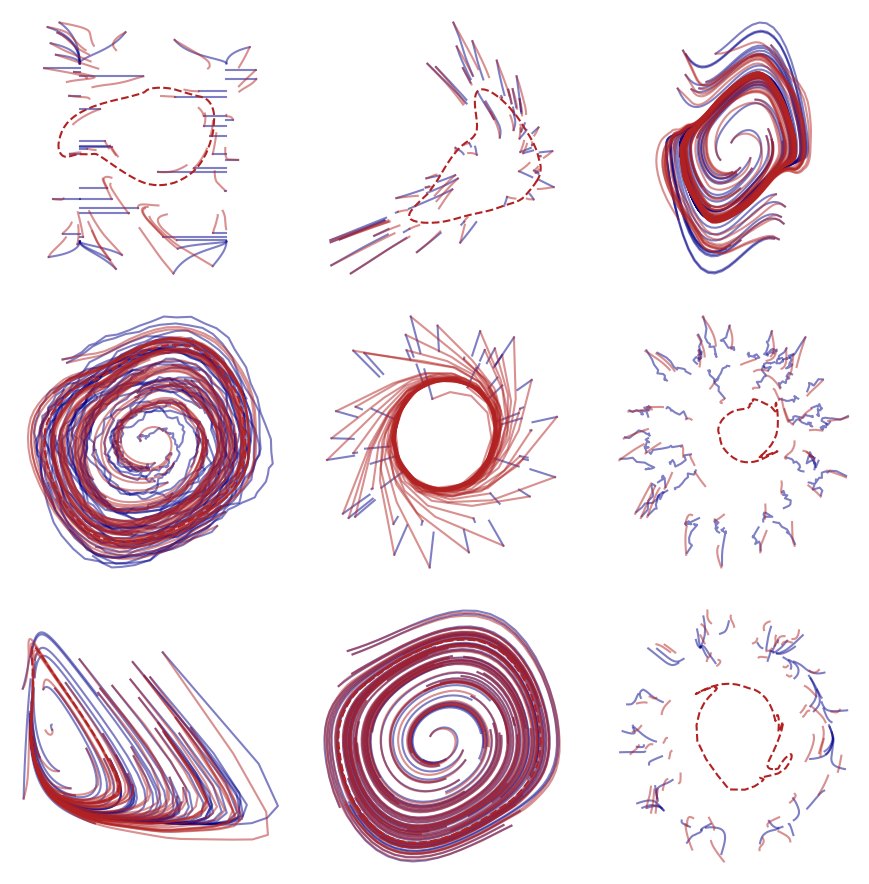

In [86]:
#third archetype (lc)
archtype_j = 2
ring_target_fits = list(archtype_folders[archtype_j].glob('*.npz'))
traj_source_files = list(archtype_folders[archtype_j].glob('traj_motif_source*.npy'))
traj_motif_transformed_files = list(archtype_folders[archtype_j].glob('traj_motif_transformed*.npy'))


fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()  # Flatten 3x3 array into a list of 9 axes

for target_i in range(len(target_files)):
    ax = axes[target_i]

    trajectories_target = np.load(target_files[target_i])
    trajectories_target_full, trajectories_target, mean, std = normalize_scale_pair_np(trajectories_target, False)

    #traj_motif_source = np.load(traj_source_files[target_i])
    traj_motif_transformed = np.load(traj_motif_transformed_files[target_i])
    inv_man = np.load(ring_target_fits[target_i])['inv_man']

    for i in range(trajectories_target.shape[0]):
        ax.plot(trajectories_target[i, :, 0], trajectories_target[i, :, 1], color='darkblue', alpha=0.5)
    for i in range(traj_motif_transformed.shape[0]):
        ax.plot(traj_motif_transformed[i, :, 0], traj_motif_transformed[i, :, 1], color='firebrick', alpha=0.5)
    
    ax.plot(inv_man[:, 0], inv_man[:, 1], '--', color='firebrick')
    ax.set_aspect('equal')
    ax.axis('off')

plt.tight_layout()
plt.savefig(fig_dir/'lc_traj_invman.pdf', dpi=300, bbox_inches='tight')
plt.show()

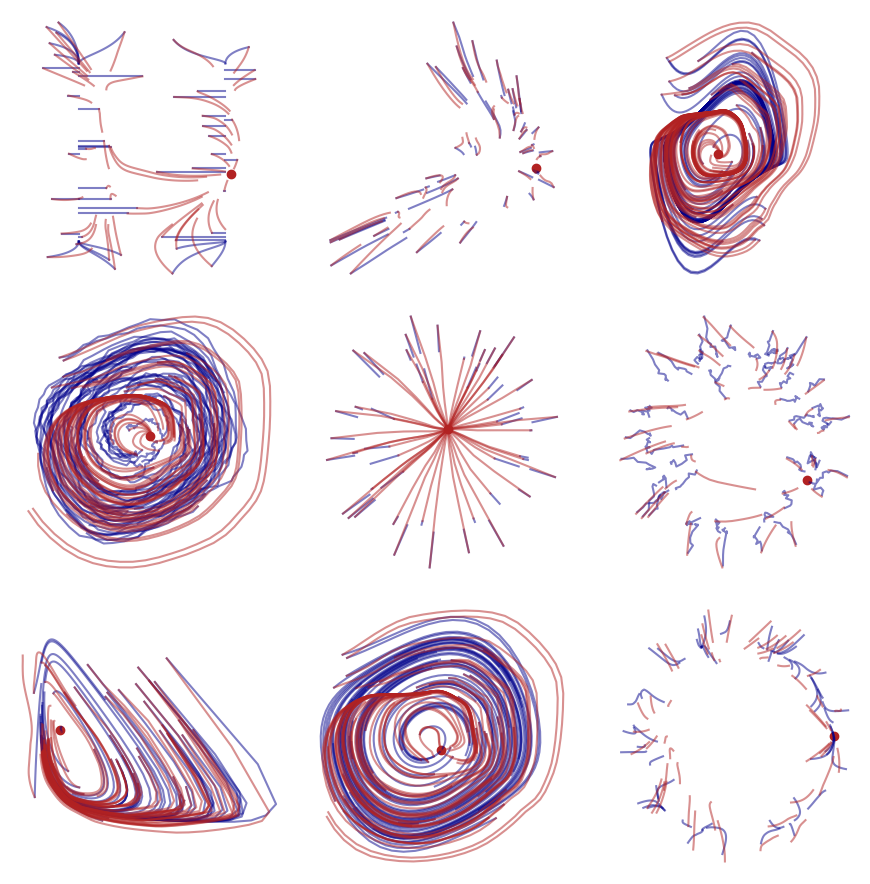

In [87]:
#fourth archetype (lds)
archtype_j = 3
ring_target_fits = list(archtype_folders[archtype_j].glob('*.npz'))
traj_source_files = list(archtype_folders[archtype_j].glob('traj_motif_source*.npy'))
traj_motif_transformed_files = list(archtype_folders[archtype_j].glob('traj_motif_transformed*.npy'))


fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()  # Flatten 3x3 array into a list of 9 axes

for target_i in range(len(target_files)):
    ax = axes[target_i]

    trajectories_target = np.load(target_files[target_i])
    trajectories_target_full, trajectories_target, mean, std = normalize_scale_pair_np(trajectories_target, False)

    #traj_motif_source = np.load(traj_source_files[target_i])
    traj_motif_transformed = np.load(traj_motif_transformed_files[target_i])
    inv_man = np.load(ring_target_fits[target_i])['inv_man']

    for i in range(trajectories_target.shape[0]):
        ax.plot(trajectories_target[i, :, 0], trajectories_target[i, :, 1], color='darkblue', alpha=0.5)
    for i in range(traj_motif_transformed.shape[0]):
        ax.plot(traj_motif_transformed[i, :, 0], traj_motif_transformed[i, :, 1], color='firebrick', alpha=0.5)
    
    ax.scatter(inv_man[0], inv_man[1], color='firebrick')
    ax.set_aspect('equal')
    ax.axis('off')

plt.tight_layout()
plt.savefig(fig_dir/'lds_traj_invman.pdf', dpi=300, bbox_inches='tight')
plt.show()